In [71]:
#libraries 
import numpy as np
import pandas as pd
import re
import os


#preprocessing
import string
from time import time  
from nltk.corpus import stopwords #remove stop words
chachedWords = stopwords.words('english')

#translation 
from nltk.translate.bleu_score import sentence_bleu
from gensim import models

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#cosine similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import math
from collections import Counter

#Word Movin Distance
from gensim import models
import gensim.downloader as api
from pyemd import emd

#visualization 
import seaborn as sns
from keras import regularizers

In [8]:
corpus_score = pd.read_csv(r'C:\Users\hirom\OneDrive - NOVAIMS\NOVA IMS\OneDrive_1_25-02-2021\Text Mining\Project\corpus\de-en\scores.csv')
corpus_ref = np.load(r'C:\Users\hirom\OneDrive - NOVAIMS\NOVA IMS\OneDrive_1_25-02-2021\Text Mining\Project\corpus\de-en\laser.reference_embeds.npy')
corpus_original = np.load(r'C:\Users\hirom\OneDrive - NOVAIMS\NOVA IMS\OneDrive_1_25-02-2021\Text Mining\Project\corpus\de-en\laser.source_embeds.npy')
corpus_trans = np.load(r'C:\Users\hirom\OneDrive - NOVAIMS\NOVA IMS\OneDrive_1_25-02-2021\Text Mining\Project\corpus\de-en\laser.translation_embeds.npy') 

In [26]:
test_score = pd.read_csv(r'C:\Users\hirom\OneDrive - NOVAIMS\NOVA IMS\OneDrive_1_25-02-2021\Text Mining\Project\test\de-en\scores.csv')
test_trans = np.load(r'C:\Users\hirom\OneDrive - NOVAIMS\NOVA IMS\OneDrive_1_25-02-2021\Text Mining\Project\test\de-en\laser.translation_embeds.npy')
test_ref = np.load(r'C:\Users\hirom\OneDrive - NOVAIMS\NOVA IMS\OneDrive_1_25-02-2021\Text Mining\Project\test\de-en\laser.reference_embeds.npy')


In [32]:
## Import Libraries Regression 

from keras.regularizers import l1
from keras.layers import Dense 
from pandas import DataFrame
from matplotlib import pyplot                                                   
from keras import models 
from keras.models import Sequential
from keras import layers
from sklearn.model_selection import train_test_split

In [33]:
X = np.concatenate((corpus_ref,corpus_trans), axis=1)

In [56]:
X.shape

(21704, 2048)

In [34]:
y = corpus_score['z-score']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [57]:
model_NN = Sequential()
model_NN.add(layers.Dense(2048, activation ='relu'))
model_NN.add(layers.Dense(1024, activation ='relu'))
model_NN.add(layers.Dense(1024, activation ='sigmoid'))
model_NN.add(layers.Dense(500))

In [58]:
model_NN.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])

In [59]:
history_NN = model_NN.fit(X_train, y_train, validation_data=(X_test, y_test),
                   epochs=100, verbose=1, batch_size=32)

Epoch 1/100
475/475 [==============================] - 61s 127ms/step - loss: 0.7617 - mae: 0.7021 - val_loss: 0.7328 - val_mae: 0.6930
Epoch 2/100
475/475 [==============================] - 62s 131ms/step - loss: 0.7237 - mae: 0.6862 - val_loss: 0.7379 - val_mae: 0.7100
Epoch 3/100
475/475 [==============================] - 67s 141ms/step - loss: 0.6846 - mae: 0.6650 - val_loss: 0.7226 - val_mae: 0.6957
Epoch 4/100
475/475 [==============================] - 64s 134ms/step - loss: 0.6582 - mae: 0.6456 - val_loss: 0.7360 - val_mae: 0.6609
Epoch 5/100
475/475 [==============================] - 71s 149ms/step - loss: 0.6608 - mae: 0.6419 - val_loss: 0.7038 - val_mae: 0.6634
Epoch 6/100
475/475 [==============================] - 70s 148ms/step - loss: 0.6335 - mae: 0.6287 - val_loss: 0.6919 - val_mae: 0.6440
Epoch 7/100
475/475 [==============================] - 77s 163ms/step - loss: 0.5993 - mae: 0.6117 - val_loss: 0.6841 - val_mae: 0.6431
Epoch 8/100
475/475 [===========================

Epoch 61/100
475/475 [==============================] - 67s 140ms/step - loss: 0.2303 - mae: 0.3521 - val_loss: 0.7864 - val_mae: 0.6537
Epoch 62/100
475/475 [==============================] - 67s 141ms/step - loss: 0.2330 - mae: 0.3546 - val_loss: 0.8761 - val_mae: 0.7021
Epoch 63/100
475/475 [==============================] - 59s 124ms/step - loss: 0.2308 - mae: 0.3521 - val_loss: 0.7709 - val_mae: 0.6511
Epoch 64/100
475/475 [==============================] - 67s 140ms/step - loss: 0.2190 - mae: 0.3412 - val_loss: 0.7877 - val_mae: 0.6487
Epoch 65/100
475/475 [==============================] - 68s 143ms/step - loss: 0.2144 - mae: 0.3388 - val_loss: 0.8182 - val_mae: 0.6796
Epoch 66/100
475/475 [==============================] - 59s 124ms/step - loss: 0.2180 - mae: 0.3374 - val_loss: 0.7753 - val_mae: 0.6570
Epoch 67/100
475/475 [==============================] - 67s 141ms/step - loss: 0.2145 - mae: 0.3367 - val_loss: 0.8312 - val_mae: 0.6868
Epoch 68/100
475/475 [===================

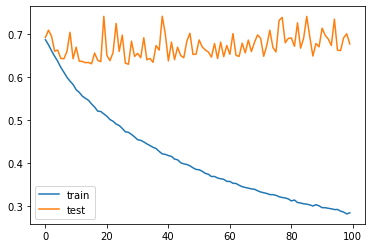

In [61]:
# plot history mae
pyplot.plot(history_NN.history['mae'], label='train')
pyplot.plot(history_NN.history['val_mae'], label='test')
pyplot.legend()
pyplot.show()

In [72]:
model_NN2 = Sequential()
model_NN2.add(layers.Dense(2048,activation ='relu'))
model_NN2.add(layers.Dropout(0.6))
model_NN2.add(layers.Dense(1024, activation ='relu'))
model_NN2.add(layers.Dropout(0.3))
model_NN2.add(layers.Dense(1024,activation ='relu'))
model_NN2.add(layers.Dense(500))

In [67]:
model_NN2.compile(optimizer='adam', loss='mse', metrics = ['mae'])

In [68]:
history_NN2 = model_NN2.fit(X_train, y_train, validation_data=(X_test, y_test),
                   epochs=50, verbose=1, batch_size=54)

Epoch 1/50
282/282 [==============================] - 16s 52ms/step - loss: 0.7401 - mae: 0.6930 - val_loss: 0.7309 - val_mae: 0.6799
Epoch 2/50
282/282 [==============================] - 15s 53ms/step - loss: 0.7113 - mae: 0.6751 - val_loss: 0.7075 - val_mae: 0.6702
Epoch 3/50
282/282 [==============================] - 15s 54ms/step - loss: 0.6866 - mae: 0.6596 - val_loss: 0.7031 - val_mae: 0.6672
Epoch 4/50
282/282 [==============================] - 14s 51ms/step - loss: 0.6745 - mae: 0.6506 - val_loss: 0.6954 - val_mae: 0.6612
Epoch 5/50
282/282 [==============================] - 15s 54ms/step - loss: 0.6532 - mae: 0.6404 - val_loss: 0.7123 - val_mae: 0.6908
Epoch 6/50
282/282 [==============================] - 16s 56ms/step - loss: 0.6572 - mae: 0.6374 - val_loss: 0.6916 - val_mae: 0.6519
Epoch 7/50
282/282 [==============================] - 18s 63ms/step - loss: 0.6271 - mae: 0.6221 - val_loss: 0.6966 - val_mae: 0.6467
Epoch 8/50
282/282 [==============================] - 17s 61ms

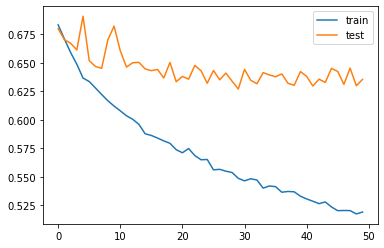

In [69]:
# plot history mae
pyplot.plot(history_NN2.history['mae'], label='train')
pyplot.plot(history_NN2.history['val_mae'], label='test')
pyplot.legend()
pyplot.show()

In [74]:
model_NN3 = Sequential()
model_NN3.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(0.001),activation ='relu'))
model_NN3.add(layers.Dropout(0.6))
model_NN3.add(layers.Dense(1024,kernel_regularizer=regularizers.l2(0.001), activation ='relu'))
model_NN3.add(layers.Dropout(0.3))
model_NN3.add(layers.Dense(1024,activation ='relu'))
model_NN3.add(layers.Dense(500))

In [75]:
model_NN3.compile(optimizer='adam', loss='mse', metrics = ['mae'])

In [76]:
history_NN3 = model_NN3.fit(X_train, y_train, validation_data=(X_test, y_test),
                   epochs=100, verbose=1, batch_size=512)

Epoch 1/100
30/30 [==============================] - 5s 114ms/step - loss: 2.3178 - mae: 0.6843 - val_loss: 0.9612 - val_mae: 0.6917
Epoch 2/100
30/30 [==============================] - 3s 109ms/step - loss: 0.8354 - mae: 0.6785 - val_loss: 0.7437 - val_mae: 0.6810
Epoch 3/100
30/30 [==============================] - 3s 108ms/step - loss: 0.7157 - mae: 0.6675 - val_loss: 0.7390 - val_mae: 0.6741
Epoch 4/100
30/30 [==============================] - 3s 114ms/step - loss: 0.7260 - mae: 0.6705 - val_loss: 0.7330 - val_mae: 0.6838
Epoch 5/100
30/30 [==============================] - 3s 114ms/step - loss: 0.7238 - mae: 0.6657 - val_loss: 0.7363 - val_mae: 0.6914
Epoch 6/100
30/30 [==============================] - 3s 111ms/step - loss: 0.7102 - mae: 0.6625 - val_loss: 0.7374 - val_mae: 0.6579
Epoch 7/100
30/30 [==============================] - 3s 112ms/step - loss: 0.7005 - mae: 0.6511 - val_loss: 0.7200 - val_mae: 0.6607
Epoch 8/100
30/30 [==============================] - 3s 110ms/step - 

30/30 [==============================] - 4s 134ms/step - loss: 0.6322 - mae: 0.6117 - val_loss: 0.7132 - val_mae: 0.6722
Epoch 63/100
30/30 [==============================] - 4s 136ms/step - loss: 0.6439 - mae: 0.6251 - val_loss: 0.7064 - val_mae: 0.6416
Epoch 64/100
30/30 [==============================] - 4s 133ms/step - loss: 0.6445 - mae: 0.6169 - val_loss: 0.7102 - val_mae: 0.6396
Epoch 65/100
30/30 [==============================] - 4s 132ms/step - loss: 0.6205 - mae: 0.6090 - val_loss: 0.7006 - val_mae: 0.6507
Epoch 66/100
30/30 [==============================] - 4s 142ms/step - loss: 0.6366 - mae: 0.6172 - val_loss: 0.7069 - val_mae: 0.6372
Epoch 67/100
30/30 [==============================] - 4s 138ms/step - loss: 0.6088 - mae: 0.6025 - val_loss: 0.7081 - val_mae: 0.6432
Epoch 68/100
30/30 [==============================] - 4s 132ms/step - loss: 0.6313 - mae: 0.6118 - val_loss: 0.7055 - val_mae: 0.6565
Epoch 69/100
30/30 [==============================] - 4s 147ms/step - loss:

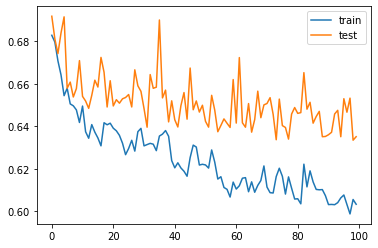

In [77]:
# plot history mae
pyplot.plot(history_NN3.history['mae'], label='train')
pyplot.plot(history_NN3.history['val_mae'], label='test')
pyplot.legend()
pyplot.show()

In [84]:
model_NN4 = Sequential()
model_NN4.add(layers.Dense(1024, kernel_regularizer=regularizers.l2(0.001),activation ='relu'))
model_NN4.add(layers.Dropout(0.6))
model_NN4.add(layers.Dense(1024,kernel_regularizer=regularizers.l2(0.001), activation ='relu'))
model_NN4.add(layers.Dropout(0.3))
model_NN4.add(layers.Dense(1024, activation ='relu'))
model_NN4.add(layers.Dropout(0.3))
model_NN4.add(layers.Dense(1024,activation ='relu'))
model_NN4.add(layers.Dense(500))

In [85]:
model_NN4.compile(optimizer='adam', loss='mse', metrics = ['mae'])

In [86]:
history_NN4 = model_NN4.fit(X_train, y_train, validation_data=(X_test, y_test),
                   epochs=100, verbose=1, batch_size=1024)

Epoch 1/100
15/15 [==============================] - 7s 383ms/step - loss: 2.6430 - mae: 0.6815 - val_loss: 1.5774 - val_mae: 0.6919
Epoch 2/100
15/15 [==============================] - 5s 356ms/step - loss: 1.3514 - mae: 0.6791 - val_loss: 0.9605 - val_mae: 0.6930
Epoch 3/100
15/15 [==============================] - 5s 338ms/step - loss: 0.8807 - mae: 0.6771 - val_loss: 0.8048 - val_mae: 0.7133
Epoch 4/100
15/15 [==============================] - 5s 327ms/step - loss: 0.7615 - mae: 0.6934 - val_loss: 0.7621 - val_mae: 0.6939
Epoch 5/100
15/15 [==============================] - 5s 339ms/step - loss: 0.7436 - mae: 0.6860 - val_loss: 0.7514 - val_mae: 0.6915
Epoch 6/100
15/15 [==============================] - 5s 340ms/step - loss: 0.7427 - mae: 0.6828 - val_loss: 0.7462 - val_mae: 0.6901
Epoch 7/100
15/15 [==============================] - 5s 335ms/step - loss: 0.7277 - mae: 0.6789 - val_loss: 0.7388 - val_mae: 0.6863
Epoch 8/100
15/15 [==============================] - 5s 355ms/step - 

15/15 [==============================] - 6s 370ms/step - loss: 0.6387 - mae: 0.6172 - val_loss: 0.7031 - val_mae: 0.6391
Epoch 63/100
15/15 [==============================] - 5s 367ms/step - loss: 0.6182 - mae: 0.6069 - val_loss: 0.7018 - val_mae: 0.6493
Epoch 64/100
15/15 [==============================] - 5s 370ms/step - loss: 0.6255 - mae: 0.6092 - val_loss: 0.7033 - val_mae: 0.6482
Epoch 65/100
15/15 [==============================] - 5s 369ms/step - loss: 0.6215 - mae: 0.6096 - val_loss: 0.7138 - val_mae: 0.6386
Epoch 66/100
15/15 [==============================] - 6s 378ms/step - loss: 0.6057 - mae: 0.5959 - val_loss: 0.7085 - val_mae: 0.6501
Epoch 67/100
15/15 [==============================] - 6s 384ms/step - loss: 0.6147 - mae: 0.6042 - val_loss: 0.7183 - val_mae: 0.6370
Epoch 68/100
15/15 [==============================] - 6s 384ms/step - loss: 0.6143 - mae: 0.6009 - val_loss: 0.7094 - val_mae: 0.6547
Epoch 69/100
15/15 [==============================] - 5s 363ms/step - loss:

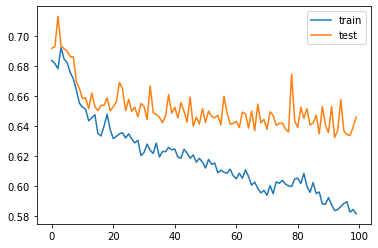

In [87]:
# plot history mae
pyplot.plot(history_NN4.history['mae'], label='train')
pyplot.plot(history_NN4.history['val_mae'], label='test')
pyplot.legend()
pyplot.show()

In [88]:
embedding = pd.read_csv(r'C:\Users\hirom\Documents\GitHub\textmining_project\embedding.csv')

In [89]:
embedding

,Unnamed: 0,0
0,0,[-0.10792572 0.12389751 0.25566956 ... -0.02...
1,1,[ 0.04812582 0.07725474 -0.03534047 ... 0.06...
2,2,[ 0.2967706 0.2997977 0.01304355 ... -0.01...
3,3,[0.15068229 0.2225158 0.07857572 ... 0.071155...
4,4,[-0.07645159 -0.10368473 0.01216881 ... 0.01...
...,...,...
21699,21699,[ 0.1450022 0.01305059 -0.43658495 ... 0.05...
21700,21700,[-0.39269152 -0.23705305 -0.08741707 ... -0.38...
21701,21701,[ 0.5667597 0.13761857 0.23148991 ... -0.38...
21702,21702,[-0.12846397 0.04416292 -0.14952272 ... 0.49...


In [97]:
teste = embedding['0']

In [98]:
teste.shape

(21704,)

In [94]:
X = np.concatenate((teste,corpus_trans), axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1